# Model Specification
The model is:

\begin{align}
Y = 1 + 2X + \epsilon,
\end{align}

where $\epsilon \sim N(\mu, \sigma)$ is the random error term.

## Data Simulation

In [250]:
# Define coeffient & slope
a = 1
b = 2

# Function to simulate data
simulate <- function (n_samples) {
    df = matrix(rep(NA, n_samples*2), ncol=2)
    e = rnorm(n_samples, 0, .04)
    x = runif(n_samples, 0, 1)

    for (i in 1:n_samples) {
        df[i, ] = c(x[i], a + b * x[i] + e[i])
    }
    df = data.frame(df)
    names(df) <- c ('X', 'Y')
    
    return(df)
}

### Small Sample Size

In [251]:
df_s = simulate(50)
t(head(df_s))

,1,2,3,4,5,6
X,0.1968297,0.8568352,0.8986264,0.6393014,0.5063006,0.3435298
Y,1.3687663,2.7070462,2.7759777,2.2669022,2.0072790,1.6343030


### Medium Sample Size

In [252]:
df = simulate(150)
t(head(df))

,1,2,3,4,5,6
X,0.3370379,0.7195174,0.464264,0.6808988,0.4557037,0.5832254
Y,1.6728463,2.4600126,1.974906,2.3401082,1.9303516,2.2489770


### Large Sample Size

In [253]:
df_l = simulate(10000)
t(head(df))

,1,2,3,4,5,6
X,0.3370379,0.7195174,0.464264,0.6808988,0.4557037,0.5832254
Y,1.6728463,2.4600126,1.974906,2.3401082,1.9303516,2.2489770


## Scatterplot of Data

### Grouping Data by Ranges

In [247]:
library('dplyr')

group <- function (df) {
    df_mean <- df %>%
      mutate(ranges = cut(X, seq(0, 1, length=26))) %>% 
      group_by(ranges) %>% 
      dplyr::summarize(X=mean(X),Y = mean(Y)) %>% 
      as.data.frame()

    return(df_mean)
}

df_mean_s <- group(df_s)

t(head(df_mean_s))

df_mean <- group(df)

t(head(df_mean))

df_mean_l <- group(df_l)

t(head(df_mean_l))

,1,2,3,4,5,6
ranges,"(0,0.04]","(0.04,0.08]","(0.08,0.12]","(0.16,0.2]","(0.24,0.28]","(0.36,0.4]"
X,0.02585245,0.06081498,0.09149018,0.18959160,0.25370487,0.37438003
Y,1.041596,1.094721,1.172155,1.370442,1.548662,1.710763


,1,2,3,4,5,6
ranges,"(0,0.04]","(0.04,0.08]","(0.08,0.12]","(0.12,0.16]","(0.16,0.2]","(0.2,0.24]"
X,0.02301851,0.07014338,0.11503513,0.14227816,0.17166870,0.22312370
Y,1.036310,1.142965,1.243297,1.290810,1.371873,1.444880


,1,2,3,4,5,6
ranges,"(0,0.04]","(0.04,0.08]","(0.08,0.12]","(0.12,0.16]","(0.16,0.2]","(0.2,0.24]"
X,0.02015432,0.06088728,0.10045399,0.13982787,0.17952585,0.22075625
Y,1.042492,1.125010,1.199794,1.281471,1.361015,1.442339


### Plots of Predictor vs. Response

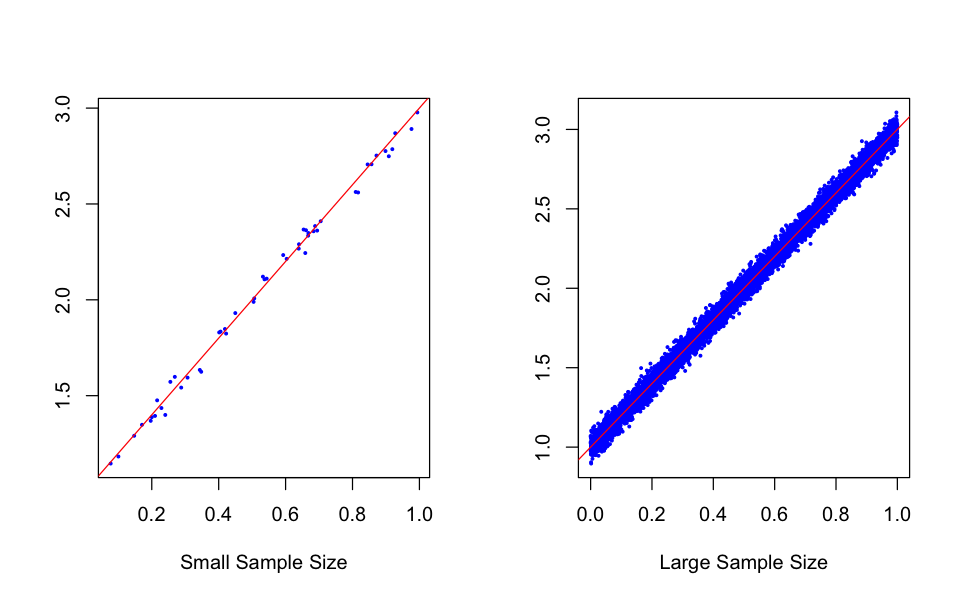

In [269]:
par(mfrow=c(1, 2))
options(repr.plot.width=8, repr.plot.height=5)

plot(df_s$X, df_s$Y, pch=19, cex=.3, xlab='Small Sample Size', ylab='', col='blue')
abline(a=a, b=b, col='red')

plot(df_l$X, df_l$Y, pch=19, cex=.3, xlab='Large Sample Size', ylab='', col='blue')
abline(a=a, b=b, col='red')

### Plot of Mean Predictor vs. Mean Response

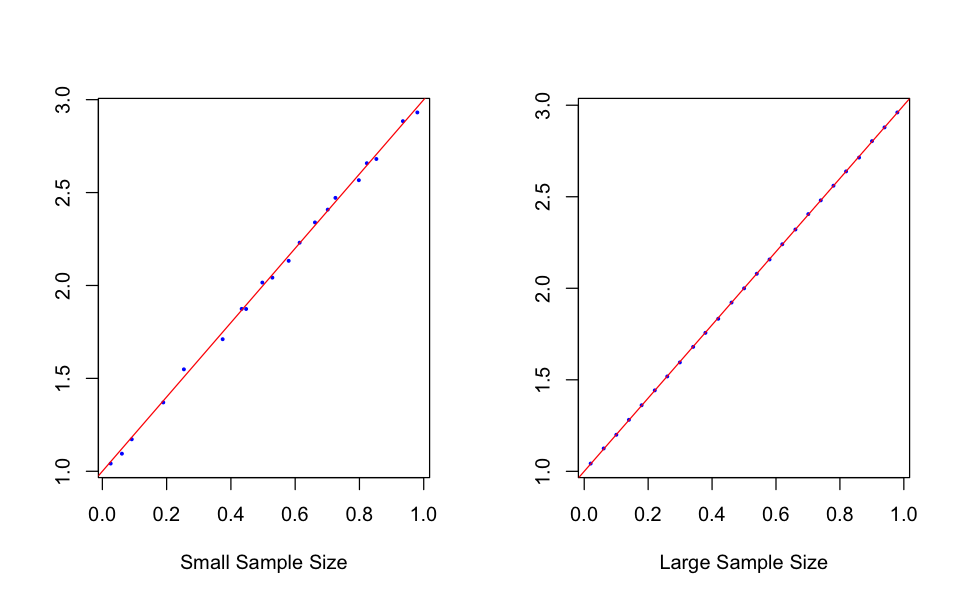

In [265]:
par(mfrow=c(1, 2))
options(repr.plot.width=8, repr.plot.height=5)

plot(df_mean_s$X, df_mean_s$Y, pch=19, cex=.3, xlab='Small Sample Size', ylab='', col='blue')
abline(a=a, b=b, col='red')

plot(df_mean_l$X, df_mean_l$Y, pch=19, cex=.3, xlab='Large Sample Size', ylab='', col='blue')
abline(a=a, b=b, col='red')

### ### Plots of Medium Sample Size Data

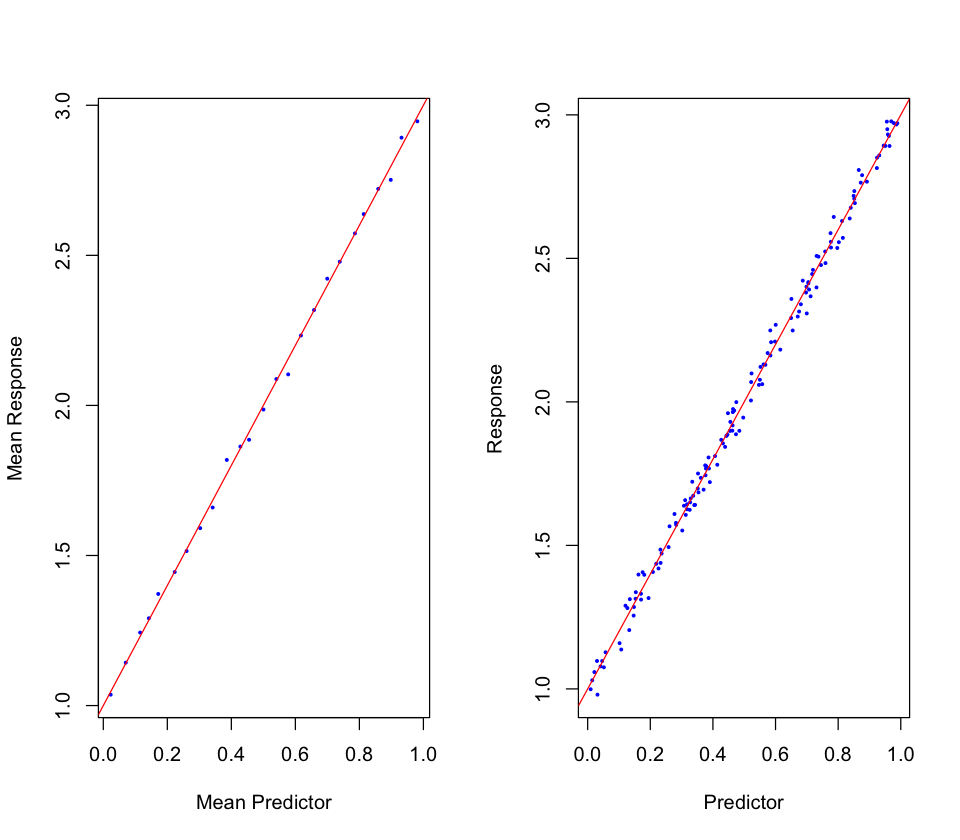

In [254]:
options(repr.plot.width=8, repr.plot.height=7)
par(mfrow=c(1,2))

plot(df_mean$X, df_mean$Y, pch=19, cex=.3, xlab='Mean Predictor', ylab='Mean Response', col='blue')
abline(a=a, b=b, col='red')

plot(df$X, df$Y, pch=19, cex=.3, xlab='Predictor', ylab='Response', col='blue')
abline(a=a, b=b, col='red')